In [ ]:
train_dataset = '/content/train_14k_split_conll (1).txt'
valid_dataset = '/content/dev_3k_split_conll.txt'
test_dataset = ''

def read_conll(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words, lang = [], []
        id = "";
        label = "";
        for line in f.readlines():
            sp = line.strip().split('\t')
            if sp[0]=="meta" and len(sp)>2:
              vc = {"id":id,"label":label,"words":words,"lang":lang}
              data.append(vc);
              words,lang = [],[]
              id = sp[1]
              label = sp[2]
            elif len(sp)>1:
              words.append(sp[0])
              lang.append(sp[1])
        vc = {"id":id,"label":label,"words":words,"lang":lang}
        data.append(vc);
    return data 





In [ ]:
MyData = read_conll(train_dataset)
print(len(MyData))
print(MyData[1]['lang'][0])

14001
Eng


In [ ]:
eng = []
hin =[]
label =[]
mix=[]
for i in range(len(MyData)):
    
    data = MyData[i]
    e=[]
    h=[]
    if len(data['label'])!=0:
        for j in range(len(data['lang'])):
            if data['lang'][j]=='Eng':
                e.append(data['words'][j])
            elif data['lang'][j]=='Hin':
                h.append(data['words'][j])
        eng.append(e)
        hin.append(h)
        label.append(data['label'])
        mix.append(data['words'])

In [ ]:
print(eng[1])
print(hin[1])
print(label[1])
print(len(eng))
print(len(hin))
print(mix[1])
print(label)

['photoshoot', 'https', 'tco', '5RSlSbZNtt']
['nehantics', 'Haan', 'yaar', 'neha', 'kab', 'karega', 'woh', 'post', 'Usne', 'na', 'sach', 'mein', 'karna', 'chahiye', 'phir', 'woh', 'post', 'karega']
neutral
14000
14000
['@', 'nehantics', 'Haan', 'yaar', 'neha', '😔😔', 'kab', 'karega', 'woh', 'post', '😭', 'Usne', 'na', 'sach', 'mein', 'photoshoot', 'karna', 'chahiye', 'phir', 'woh', 'post', 'karega', '…', 'https', '//', 'tco', '/', '5RSlSbZNtt']
['neutral', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive', 'neutral', 'negative', 'positi

In [ ]:
My_ValData = read_conll(valid_dataset)
en = []
hi =[]
label2 =[]
mixval=[]
for i in range(len(My_ValData)):
    data2 = My_ValData[i]
    e=[]
    h=[]
    if len(data2['label'])!=0:
        for j in range(len(data2['lang'])):
            if data2['lang'][j]=='Eng':
                e.append(data2['words'][j])
            elif data2['lang'][j]=='Hin':
                h.append(data2['words'][j])
        en.append(e)
        hi.append(h)
        label2.append(data2['label'])
        mixval.append(data2['words'])

In [ ]:
print(en[1])
print(hi[1])
print(label2[1])
print(len(en))
print(len(hi))
print(mix[13688])

['bkunalraj', 'TajinderBagga', 'NikhilJakhar14', 'Rashid', 'h', 'https', 't', 'co', 'P003zxqUtP']
['JammuPalchhin', 'Shehla', 'TajinderBagga', 'Tu', 'toh', 'naamakool', 'hai', 'Mare']
negative
3000
3000
['tweet']


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list1 =[]
for i in range(0, len(mix)):
    title = ' '.join(mix[i])
    
    if i==1560:
        print(title)
    title = re.sub("@ [\w]+",'',title)
    title=re.sub(r'http[s]?.*$', '', title)
    
    title = re.sub('([^A-Za-z \t])|(\w+:\/\/\S+)', '', title)
    if i==1560:
        print(title)
    title = title.lower()
    title = title.split()
    title = [word for word in title if not word in stopwords.words('english')]  
    title = ' '.join(title)
    list1.append(title)
    

list2 =[]
for i in range(0, len(mixval)):
    title = ' '.join(mixval[i])
    title = re.sub("@ [\w]+",'',title)
    title = re.sub("@_ [\w]+",'',title)
    title= re.sub('http[s]?.*$', '', title)
    title = re.sub('([^A-Za-z \t])|(\w+:\/\/\S+)', '', title)
    title = title.lower()  
    list2.append(title)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
RT @ Rahul31316222 https // t . co / BfQUHJIB7C . Gud nyt guys with his emotional song jise sunkar sari tension chli jayegi only # mom ko hug krn …
RT  


In [ ]:
print(len(list1))
print(list1[1])
print(len(list2))
print(list2[1])

t = []
l1 = []
v = []
l2 = []
for i in range(0,len(list1)):
    title = list1[i].split()    
    if len(title)>3:
        t.append(list1[i])
        l1.append(label[i])

for i in range(0,len(list2)):
    title = list2[i].split()    
    if len(title)>3:
        v.append(list2[i])
        l2.append(label2[i])




14000
haan yaar neha kab karega woh post usne na sach mein photoshoot karna chahiye phir woh post karega
3000
      rashid  tu toh naamakool hai mare h  


In [ ]:
dict = {}
for i in range(0, len(t)):
    x = t[i].split()
    for words in x:
        if words in dict:    
        # If the word exists in dictionary then simply increase its count           
            dict[words] += 1             
        else:  
        # If the word does not exists in dictionary update the dictionary and make its count 1   
            dict.update({words: 1}) 

voc_size = len(dict) 

print(voc_size)
maxSentenceLength = max([len(i) for i in t])
print(maxSentenceLength)

30322
135


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional

from keras.layers import Embedding
from keras.layers import Dropout,SpatialDropout1D
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam,SGD,RMSprop
import seaborn as sns
from tqdm import tqdm
import os
%matplotlib inline

In [ ]:
t1 = Tokenizer()
t1.fit_on_texts(t)
wordToSequenceTrain=t1.texts_to_sequences(t)
print(wordToSequenceTrain[2])
padSequenceTrain=pad_sequences(wordToSequenceTrain,padding='post',truncating='post',maxlen=100)

vocab_size = len(t1.word_index)+1

wordToSequenceVal=t1.texts_to_sequences(v)
padSequenceVal=pad_sequences(wordToSequenceVal,padding='post',truncating='post',maxlen=100)
print(vocab_size)

[6151, 74, 45, 7, 52, 23, 16, 11, 66, 134, 155, 283, 14, 270, 99, 707, 99, 2, 45, 7]
30323


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

l1lavel = l1
l2level = l2
l1=np.array(l1)
l2=np.array(l2)


lable = LabelEncoder()
Label_train = lable.fit_transform(l1)
print(Label_train.shape)
y1 = to_categorical(Label_train,num_classes=3)

lable = LabelEncoder()
Label_val = lable.fit_transform(l2)
y2 = to_categorical(Label_val,num_classes=3)

(13779,)


In [ ]:
print(l2level[1])

negative


In [ ]:
embedding_vector = {}
f = open('/content/glove.6B.100d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

2449it [00:00, 35787.68it/s]


In [ ]:
embedding_matrix = np.zeros((vocab_size,100))
for word,i in tqdm(t1.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

  0%|          | 0/30322 [00:00<?, ?it/s]


ValueError: ignored

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,100,weights = [embedding_matrix],input_length=100,trainable = False))


In [ ]:
model.add(Bidirectional(LSTM(75,dropout=0.7, recurrent_dropout=0.7)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(padSequenceTrain,y1,validation_data=(padSequenceVal,y2),epochs=20,batch_size=128)
model.save('/content/rnn_model.h5')
model.save_weights('/content/rnn_weight.h5')

Epoch 1/20
108/108 [==============================] - 78s 685ms/step - loss: 1.0616 - accuracy: 0.3966 - val_loss: 0.9865 - val_accuracy: 0.4894
Epoch 2/20
108/108 [==============================] - 71s 661ms/step - loss: 0.9962 - accuracy: 0.4773 - val_loss: 0.9535 - val_accuracy: 0.5146
Epoch 3/20
108/108 [==============================] - 72s 666ms/step - loss: 0.9783 - accuracy: 0.4926 - val_loss: 0.9362 - val_accuracy: 0.5294
Epoch 4/20
108/108 [==============================] - 74s 689ms/step - loss: 0.9697 - accuracy: 0.5000 - val_loss: 0.9289 - val_accuracy: 0.5404
Epoch 5/20
108/108 [==============================] - 72s 667ms/step - loss: 0.9510 - accuracy: 0.5188 - val_loss: 0.9273 - val_accuracy: 0.5485
Epoch 6/20
108/108 [==============================] - 69s 643ms/step - loss: 0.9538 - accuracy: 0.5192 - val_loss: 0.9215 - val_accuracy: 0.5445
Epoch 7/20
108/108 [==============================] - 75s 692ms/step - loss: 0.9550 - accuracy: 0.5199 - val_loss: 0.9212 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


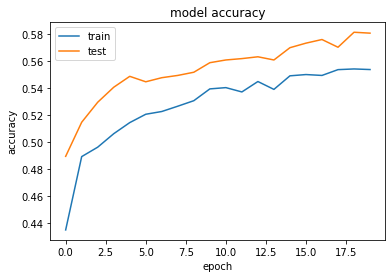

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


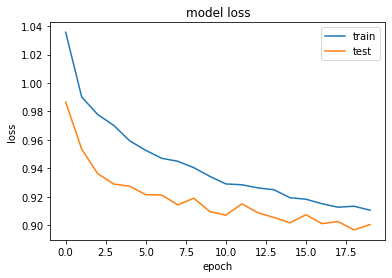

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from keras.models import load_model

# load model
model = load_model('/content/rnn_model.h5')

score = model.evaluate(padSequenceVal,y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 58.04%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(padSequenceVal)
y_pred = np.argmax(Y_pred, axis=1)
testy = np.argmax(y2,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(testy,y_pred)
print(cm)

Confusion Matrix
[[661 158  71]
 [418 415 277]
 [159 167 653]]


In [ ]:
target_names = ['neutral','negative','positive']

In [ ]:
print(classification_report(testy, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     neutral       0.53      0.74      0.62       890
    negative       0.56      0.37      0.45      1110
    positive       0.65      0.67      0.66       979

    accuracy                           0.58      2979
   macro avg       0.58      0.59      0.58      2979
weighted avg       0.58      0.58      0.57      2979



Normalized confusion matrix


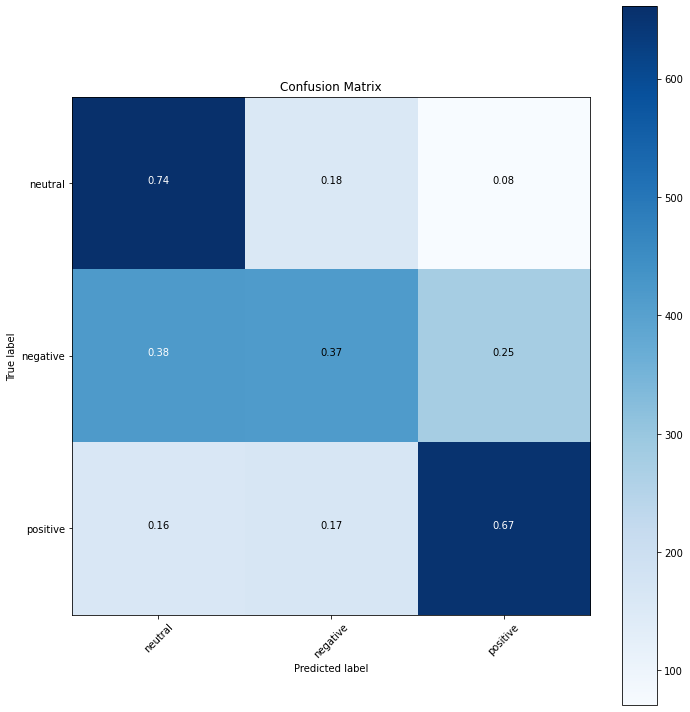

In [ ]:
import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')